#### LSTM Forward Pass (single sequence)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Data
T = 10                      # time steps
input_size = 1
hidden_size = 3

X = np.random.randn(T, input_size)

# Initialize weights
def init_gate():
    return (
        np.random.randn(hidden_size, input_size),
        np.random.randn(hidden_size, hidden_size),
        np.zeros((hidden_size, 1))
    )

Wf, Uf, bf = init_gate()   # Forget gate
Wi, Ui, bi = init_gate()   # Input gate
Wo, Uo, bo = init_gate()   # Output gate
Wc, Uc, bc = init_gate()   # Candidate memory

# Activations
sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = np.tanh

# Forward pass
h = np.zeros((hidden_size, 1))
c = np.zeros((hidden_size, 1))

H, C = [], []

print("\nLSTM Hidden & Cell States:\n")

for t in range(T):
    x = X[t].reshape(-1,1)

    f = sigmoid(Wf @ x + Uf @ h + bf)
    i = sigmoid(Wi @ x + Ui @ h + bi)
    o = sigmoid(Wo @ x + Uo @ h + bo)
    c_hat = tanh(Wc @ x + Uc @ h + bc)

    c = f * c + i * c_hat
    h = o * tanh(c)

    H.append(h.flatten())
    C.append(c.flatten())

    print(f"t={t} | h={h.flatten()} | c={c.flatten()}")

H = np.array(H)
C = np.array(C)



LSTM Hidden & Cell States:

t=0 | h=[-0.06838731  0.0556348   0.0384087 ] | c=[-0.11433312  0.15898607  0.07316267]
t=1 | h=[ 0.01475205  0.03693393 -0.0193324 ] | c=[ 0.03020842  0.06969316 -0.04111339]
t=2 | h=[-0.08216872  0.06139141  0.03432084] | c=[-0.1353305   0.19664685  0.06577786]
t=3 | h=[-0.23114958  0.02105894  0.07702753] | c=[-0.30046225  0.16525991  0.13928325]
t=4 | h=[ 0.02186098  0.04988545 -0.02529256] | c=[ 0.03894745  0.09486393 -0.05235555]
t=5 | h=[ 0.02750995 -0.05519482 -0.0365436 ] | c=[ 0.06498415 -0.09582965 -0.07753365]
t=6 | h=[-0.25106823  0.00751881  0.07938539] | c=[-0.33023477  0.0585076   0.13181184]
t=7 | h=[-0.10473754  0.05748257  0.04476514] | c=[-0.13950646  0.23996981  0.08281049]
t=8 | h=[ 0.04462827 -0.0511815  -0.05091572] | c=[ 0.10219754 -0.08239561 -0.11257399]
t=9 | h=[-0.07089089  0.03518369  0.03979818] | c=[-0.11816676  0.1017472   0.07211155]


#### LSTM Visualizations

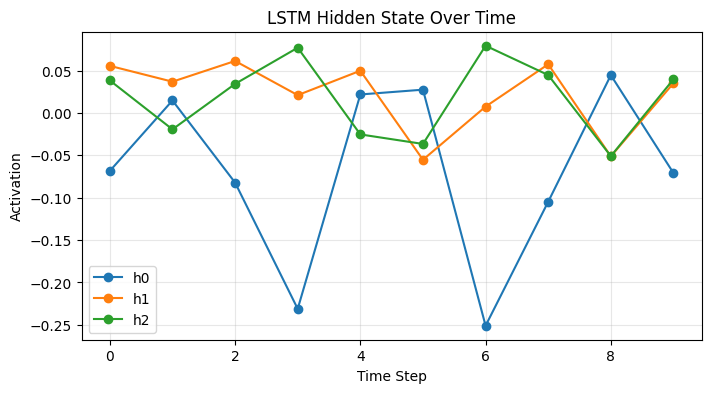

In [5]:
# 1. Hidden State over time (line plot)
plt.figure(figsize=(8,4))
for i in range(hidden_size):
    plt.plot(H[:,i], marker="o", label=f"h{i}")

plt.title("LSTM Hidden State Over Time")
plt.xlabel("Time Step")
plt.ylabel("Activation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

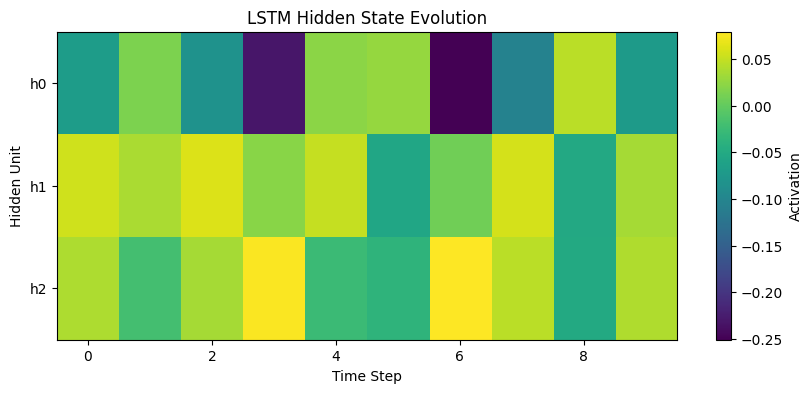

In [6]:
# 2. Hidden state heatmap

plt.figure(figsize=(10,4))
plt.imshow(H.T, aspect="auto", cmap="viridis")
plt.colorbar(label="Activation")
plt.xlabel("Time Step")
plt.ylabel("Hidden Unit")
plt.title("LSTM Hidden State Evolution")
plt.yticks(range(hidden_size), [f"h{i}" for i in range(hidden_size)])
plt.show()